In [1]:

#Importing libraries

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import requests

from bs4 import BeautifulSoup

import geopandas as gpd

In [2]:
#reading Indian shapely file 

data_map = gpd.read_file('Indian_States.shp')

print(data_map.head())

#printing 25 number state 

data_map['st_nm'].iloc[25] 

                      st_nm                                           geometry
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.16860 29.37432...
2                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
3                     Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
4                Chandigarh  POLYGON ((76.84147 30.75996, 76.83599 30.73623...


'Punjab'

In [6]:

#Extracting data from Indian govt. site 

url = 'https://www.mohfw.gov.in/'

#Request to extract data from site 

web_content = requests.get(url).content

#applying html parser to parse html content  

soup = BeautifulSoup(web_content, "html.parser")

def extract_contents(row):
    return [x.text.replace('\n', '') for x in row]

stats = [] 

all_rows = soup.find_all('tr')

#print(all_rows)

for row in all_rows:

    stat = extract_contents(row.find_all('td')) 

    if len(stat) == 6:

        stats.append(stat)
    

In [7]:
print(stats)

[['1', 'Andaman and Nicobar Islands', '11', '33', '0', '44'], ['2', 'Andhra Pradesh', '3340', '3641', '90', '7071'], ['3', 'Arunachal Pradesh', '92', '7', '0', '99'], ['4', 'Assam', '1955', '2642', '8', '4605'], ['5', 'Bihar', '1972', '4926', '44', '6942'], ['6', 'Chandigarh', '59', '303', '6', '368'], ['7', 'Chhattisgarh', '674', '1180', '10', '1864'], ['8', 'Dadra and Nagar Haveli and Daman and Diu', '45', '12', '0', '57'], ['9', 'Delhi', '27741', '17457', '1904', '47102'], ['10', 'Goa', '560', '96', '0', '656'], ['11', 'Gujarat', '6103', '17430', '1560', '25093'], ['12', 'Haryana', '4750', '3952', '130', '8832'], ['13', 'Himachal Pradesh', '189', '372', '8', '569'], ['14', 'Jammu and Kashmir', '2427', '2914', '65', '5406'], ['15', 'Jharkhand', '734', '1151', '10', '1895'], ['16', 'Karnataka', '2828', '4804', '102', '7734'], ['17', 'Kerala', '1351', '1326', '20', '2697'], ['18', 'Ladakh', '594', '92', '1', '687'], ['19', 'Madhya Pradesh', '2374', '8388', '482', '11244'], ['20', 'Maha

In [10]:
#Converting html data into dataframe 

new_cols = ["S. No.", "Name of State / UT","Active Cases*","Cured/Discharged/Migrated*","Deaths**","Total Confirmed cases*"]

state_data = pd.DataFrame(data = stats, columns = new_cols)

state_data.head()

,S. No.,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,1,Andaman and Nicobar Islands,11,33,0,44
1,2,Andhra Pradesh,3340,3641,90,7071
2,3,Arunachal Pradesh,92,7,0,99
3,4,Assam,1955,2642,8,4605
4,5,Bihar,1972,4926,44,6942


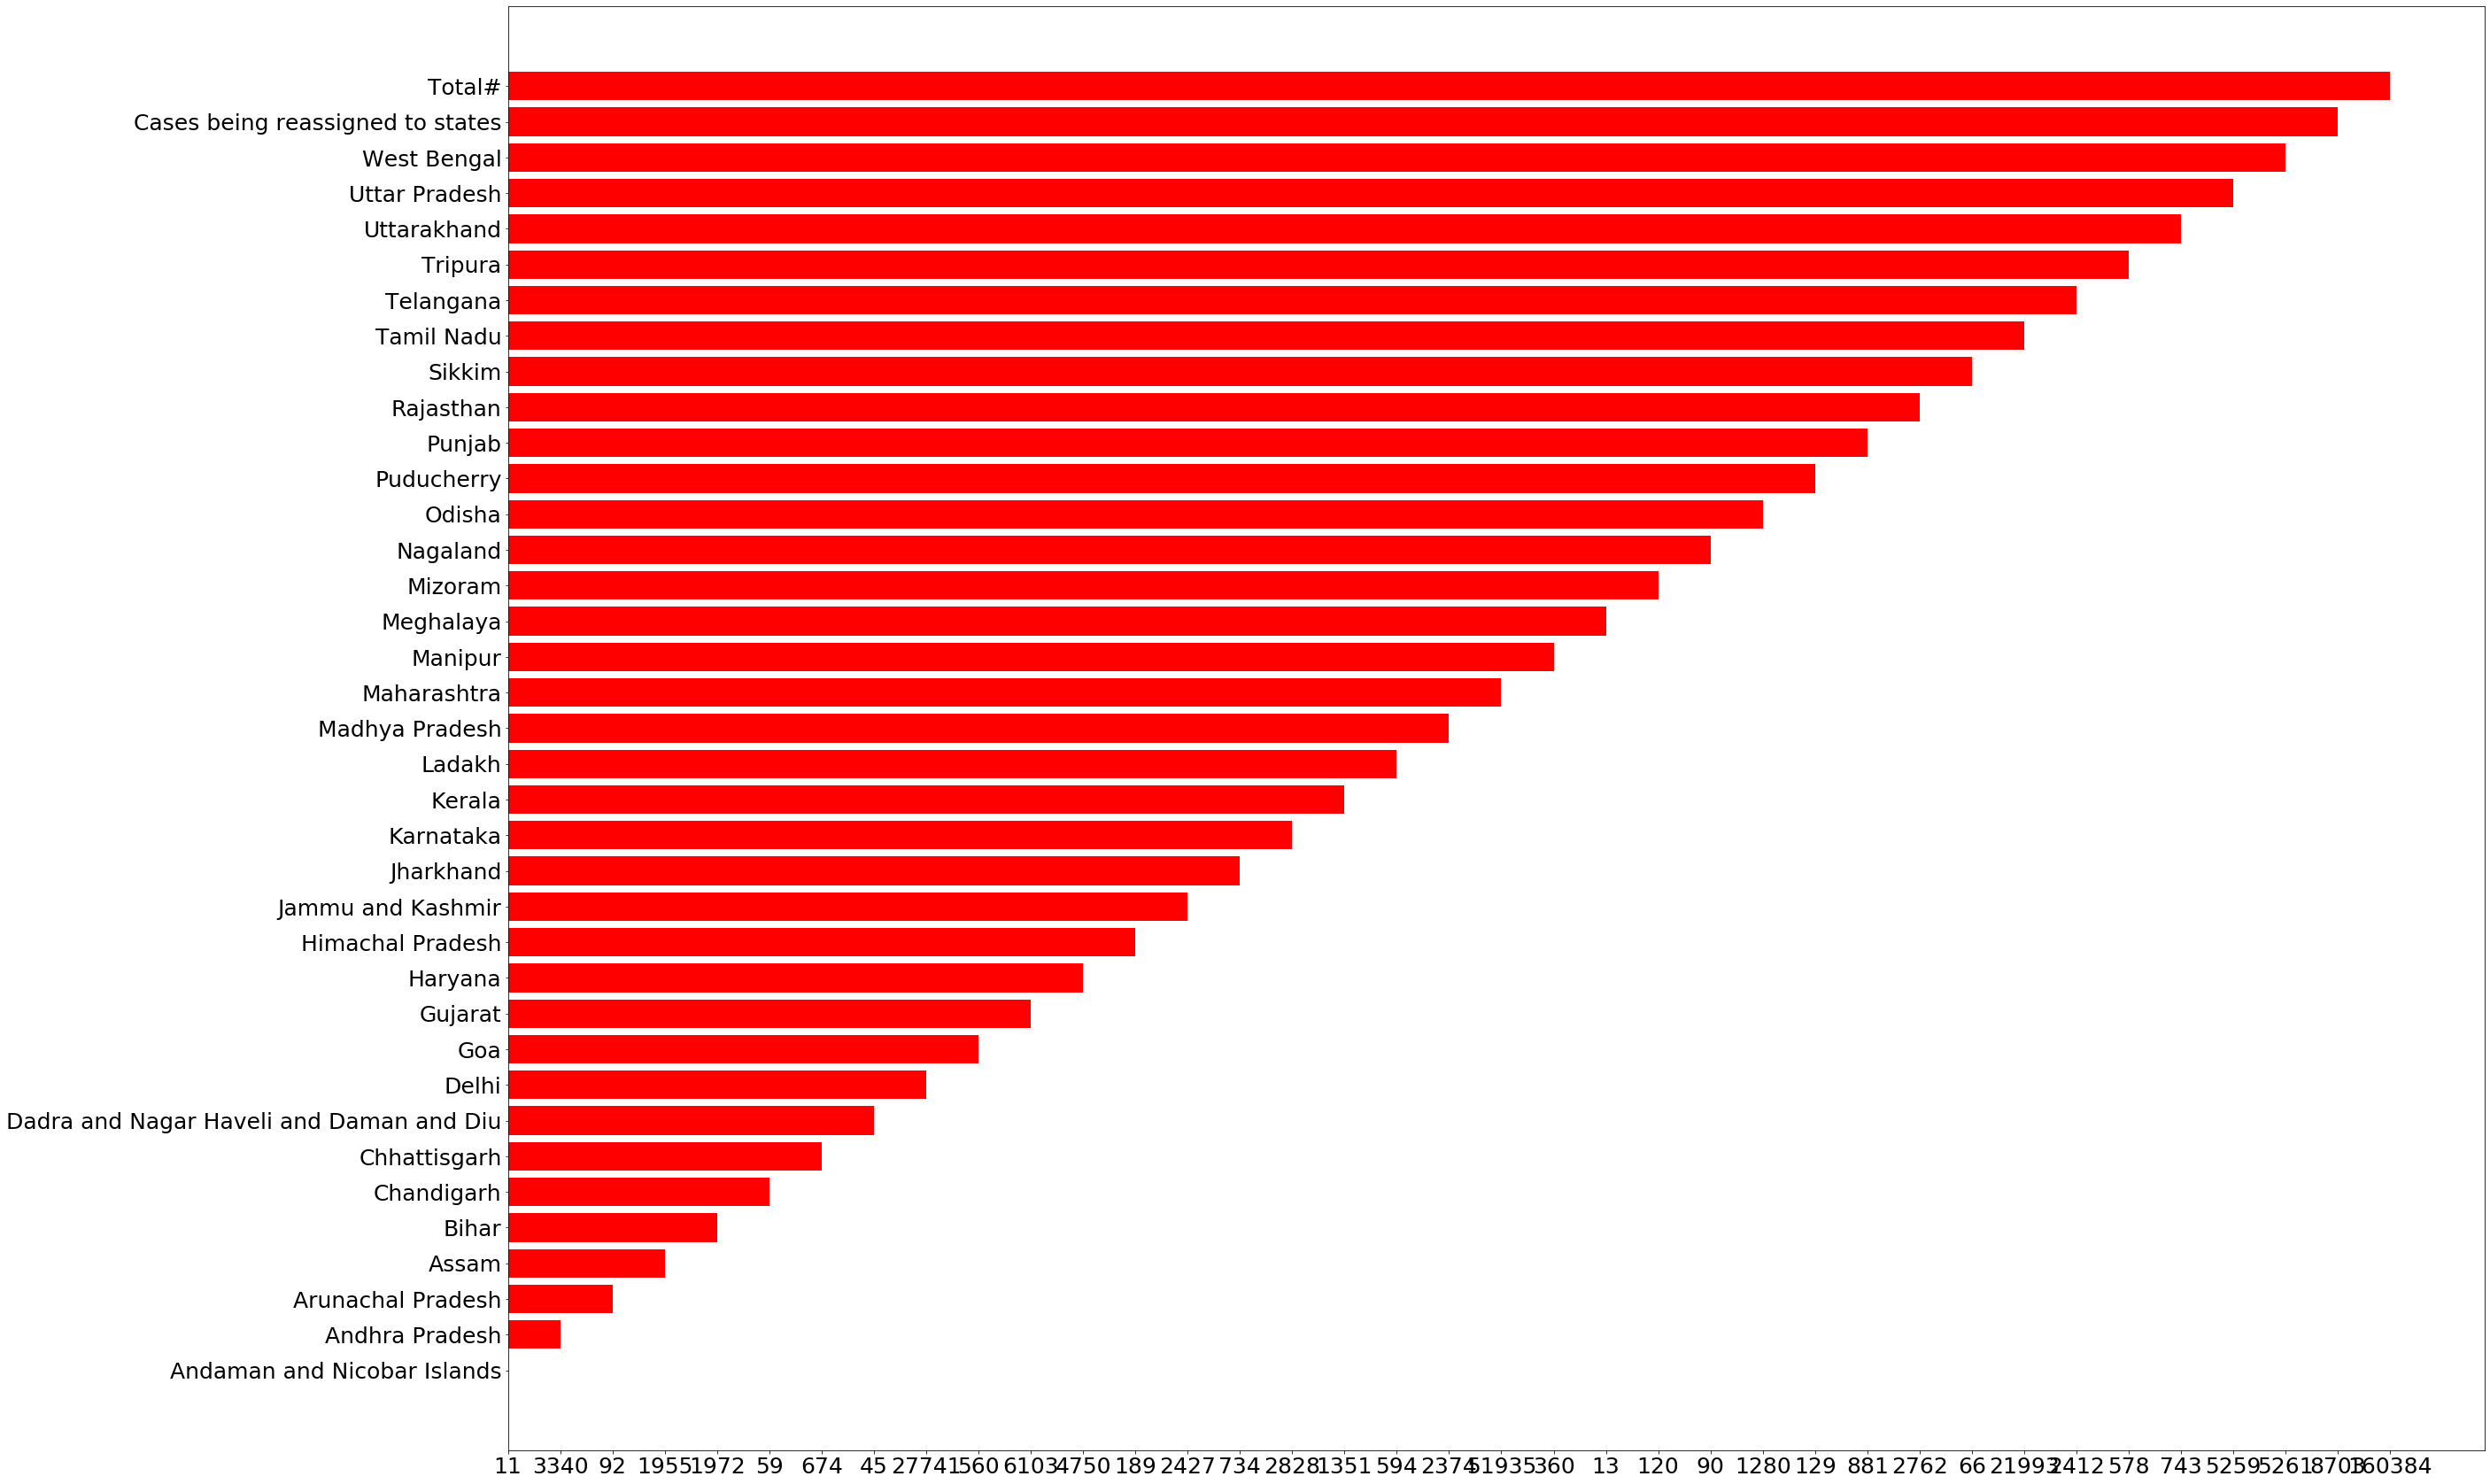

In [11]:
import matplotlib.pyplot as plt#seaborn  and matplotlib are used to deal with plots (graphs)
plt.figure(figsize=(40,30))
plt.barh(state_data["Name of State / UT"],state_data['Active Cases*'],color='red')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [12]:
#Converting html data into dataframe 

new_cols = ["S. No.", "Name of State / UT","Active Cases*","Cured/Discharged/Migrated*","Deaths**","Total Confirmed cases*"]

state_data = pd.DataFrame(data = stats, columns = new_cols)

state_data.head()

,S. No.,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,1,Andaman and Nicobar Islands,11,33,0,44
1,2,Andhra Pradesh,3340,3641,90,7071
2,3,Arunachal Pradesh,92,7,0,99
3,4,Assam,1955,2642,8,4605
4,5,Bihar,1972,4926,44,6942


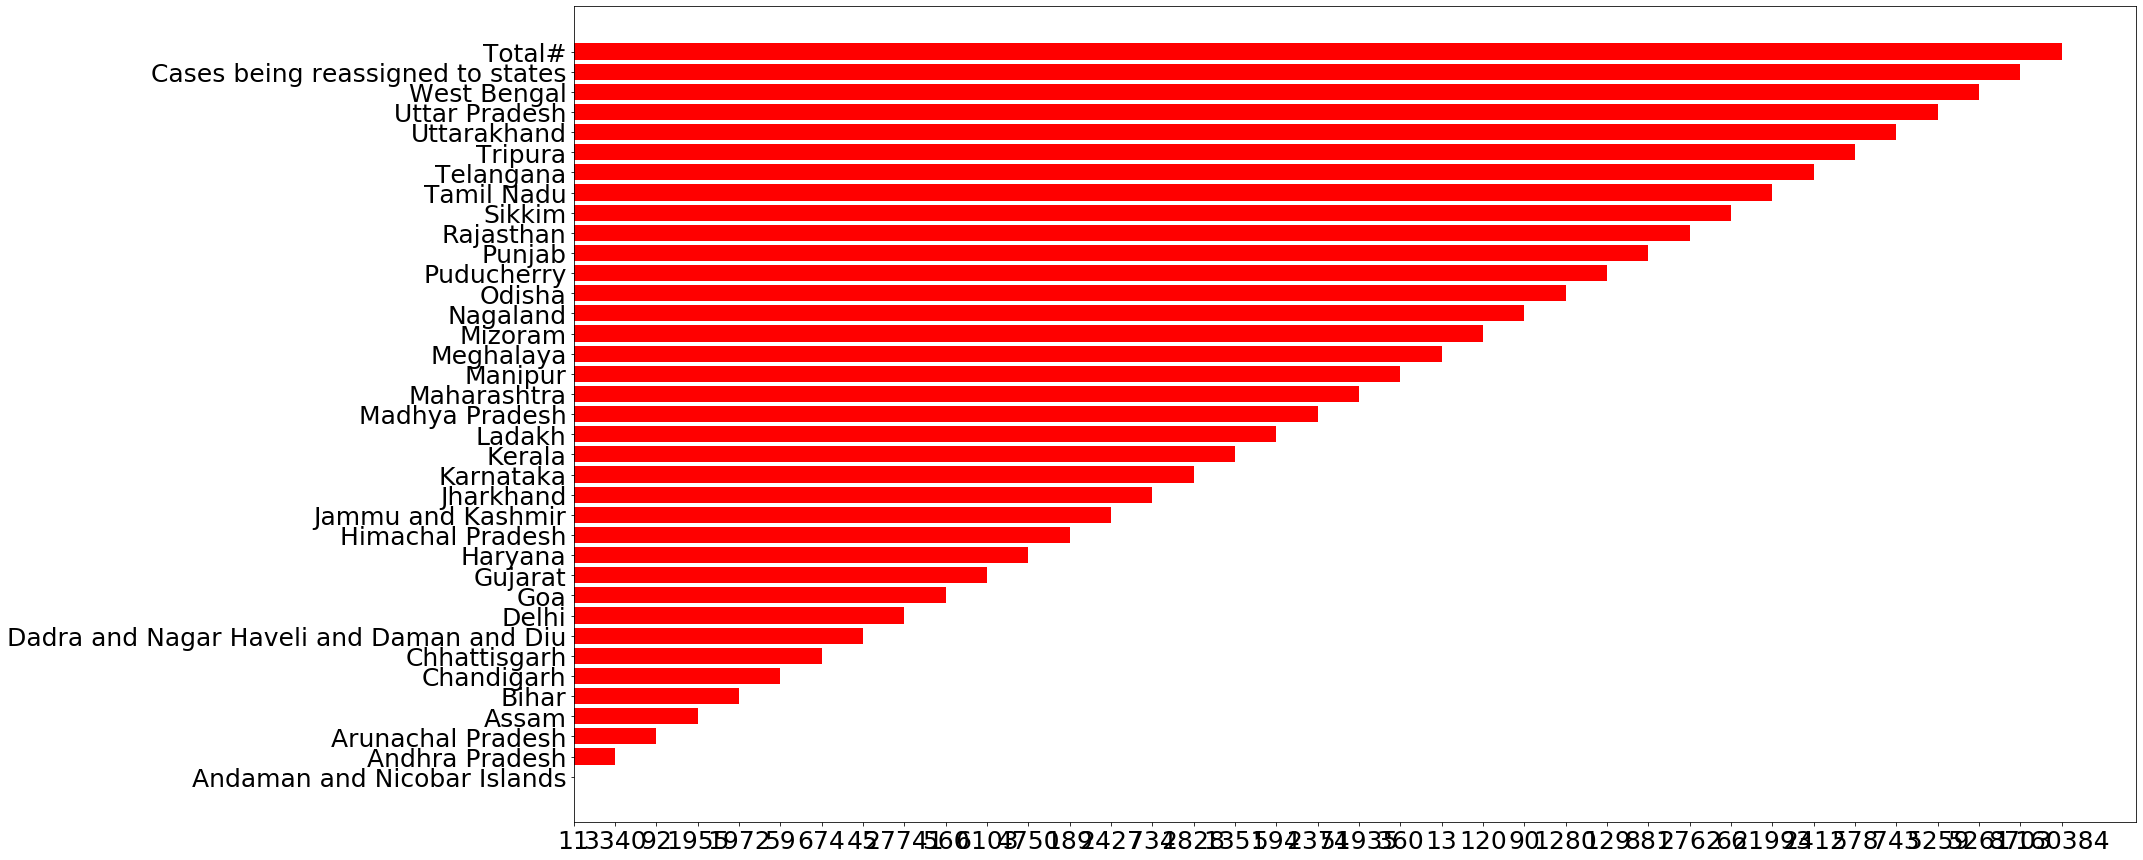

In [13]:
import matplotlib.pyplot as plt#seaborn  and matplotlib are used to deal with plots (graphs)
plt.figure(figsize=(28,15))
plt.barh(state_data["Name of State / UT"],state_data['Active Cases*'],color='red')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

C:\Users\91914\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


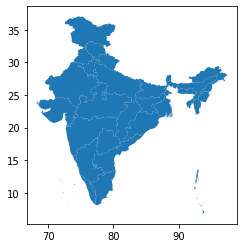

In [14]:

#Correction required to match names in both datasets 

data_map.rename(columns = {'st_nm':'Name of State / UT'}, inplace = True)

data_map['Name of State / UT'] =data_map['Name of State / UT'].str.replace('&','and')

data_map['Name of State / UT'].iloc[0]  = 'Andaman and Nicobar Islands'

data_map['Name of State / UT'].iloc[1] = 'Arunachal Pradesh'

data_map['Name of State / UT'].iloc[6] = 'Dadar Nagar Haveli'

data_map['Name of State / UT'].iloc[23] = 'Delhi'

data_map['Name of State / UT'].iloc[29]='Telengana'

#Plotting map of The India 

data_map.plot()

In [15]:
#Merging both datasets together

merged = pd.merge(data_map, state_data, on = 'Name of State / UT')

merged.drop('S. No.', axis = 1, inplace = True)

merged.head()

,Name of State / UT,geometry,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",11,33,0,44
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",92,7,0,99
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",1955,2642,8,4605
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",1972,4926,44,6942
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",59,303,6,368


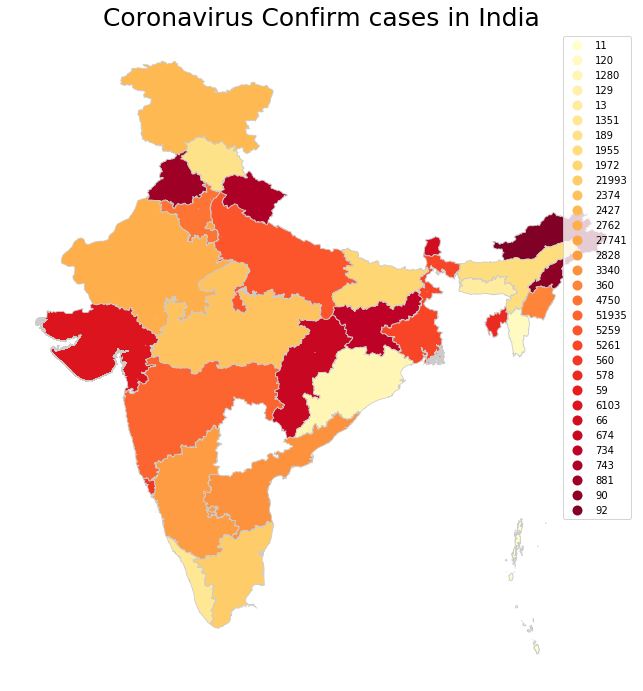

In [16]:

#plotting coronavirus cases on map 

fig, ax = plt.subplots(1, figsize=(20, 12))

ax.axis('off')

#Set the title of the map

ax.set_title('Coronavirus Confirm cases in India', fontsize=25)
merged.plot(column = 'Active Cases*',cmap='YlOrRd',linewidth=0.8, ax=ax, edgecolor='0.8',legend = True)

#Showing plot of India with coronavirus cases 

plt.show()

In [17]:
def fib(n):
    if n==1:
        return 0
    elif n==2:
        return 1
    else:
        return fib(n-1)+fib(n-2)
print(fib(7))

8
